In [1]:
import pandas as pd
import numpy as np
from GA_portfolio import Portfolio_Selection
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('指数数据1.xlsx',sheet_name='对数收益率')
data.index=data['日期']
del data['日期']

In [5]:
from GA_portfolio import Portfolio_GA
p = Portfolio_GA(his_data=data.values[:60],return_data=data.values[61:65],money=1000,random_state=1)
p.bayes()
p.get_weights()

[[0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285],
 [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285],
 [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285],
 [0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285,
  0.14285714285714285]]

##### 模型设定

###### 变异函数

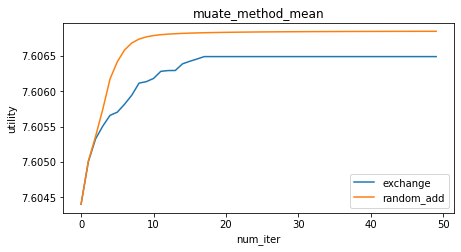

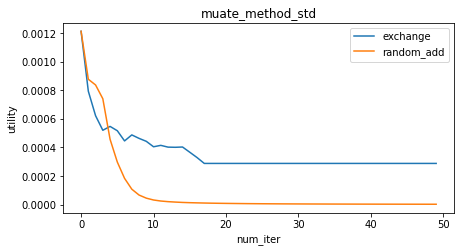

In [3]:
# 变异方法
mutate_method=['exchange','random_add']
plt.figure(figsize=(7,3.5))
plt.figure(1)
plt.title('muate_method_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in mutate_method:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=10,
        mutate_method=i,money=2000,random_state=0)
    res=ps.cal_best_iter()
    plt.plot(res[0])
plt.legend(mutate_method)
plt.savefig('figure/muate_method_mean.png',dpi=600)

plt.figure(figsize=(7,3.5))
plt.figure(2)
plt.title('muate_method_std')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in mutate_method:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=10,
        mutate_method=i,money=2000,random_state=0)
    res=ps.cal_best_iter()
    plt.plot(res[1])
plt.legend(mutate_method)
plt.savefig('figure/muate_method_std.png',dpi=600)

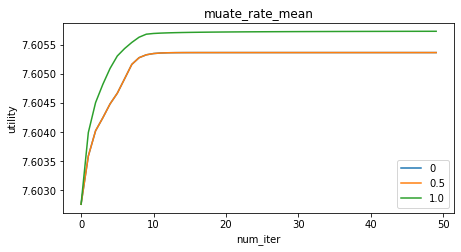

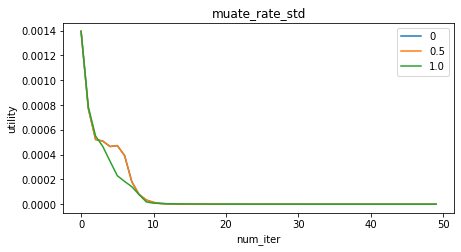

In [4]:
# 变异率
mutate_rate=[0,0.5,1.0]
rand_=7
plt.figure(figsize=(7,3.5))
plt.figure(1)
plt.title('muate_rate_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in mutate_rate:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=30,
        mutate_rate=i,money=2000,random_state=rand_)
    res=ps.cal_best_iter()
    plt.plot(res[0])
plt.legend(mutate_rate)
plt.savefig('figure/muate_rate_mean.png',dpi=600)

plt.figure(figsize=(7,3.5))
plt.figure(2)
plt.title('muate_rate_std')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in mutate_rate:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=30,
        mutate_rate=i,money=2000,random_state=rand_)
    res=ps.cal_best_iter()
    plt.plot(res[1])
plt.legend(mutate_rate)
plt.savefig('figure/muate_rate_std.png',dpi=600)

###### T S period

In [5]:
# T & period
Ts = [30,40,50,60,70,80]
Ps = [1,2,3,6,9,12]

arrs=[]
for T in Ts:
    arr=[]
    for period in Ps:
        ps=Portfolio_Selection(data.values,t=T,period=period,money=2000,random_state=0)
        ps.fit()
        arr.append(ps.get_sharpe())
    arrs.append(arr)
result = pd.DataFrame(arrs,index=Ts,columns=Ps)

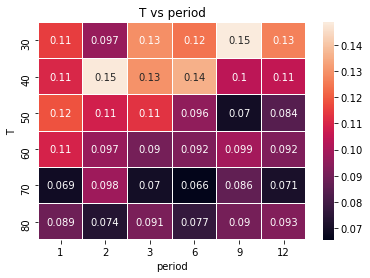

In [7]:
# 绘制热力图
sns.heatmap(result,annot=True,linewidths=0.1)
plt.xlabel('period')
plt.ylabel('T')
plt.title('T vs period')
plt.savefig('figure/T&period.png',dpi=600)

In [8]:
# s
Ss=[1,5,10,15,20]
arr=[]
for s in Ss:
    ps=Portfolio_Selection(data.values,s=s,t=60,period=2,money=2000,random_state=3)
    ps.fit()
    arr.append(ps.get_sharpe())

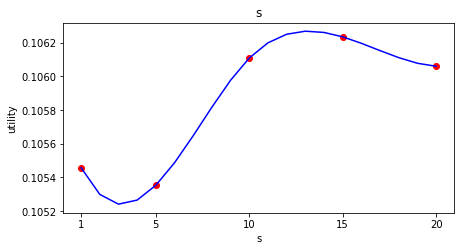

In [9]:
# 绘制对比图
import scipy.interpolate as spi
x=np.arange(1,21,1)
ipo3=spi.splrep(Ss,arr,k=3)
iy3=spi.splev(x,ipo3)

plt.figure(figsize=(7,3.5))
plt.xticks(Ss)
plt.xlabel('s')
plt.ylabel('utility')
plt.title('s')
plt.plot(Ss,arr,'ro')
plt.plot(x,iy3,'b-')
plt.savefig('figure/s.png',dpi=600)

##### 选取最优参数

###### 最大迭代次数

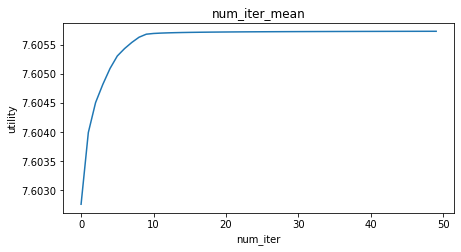

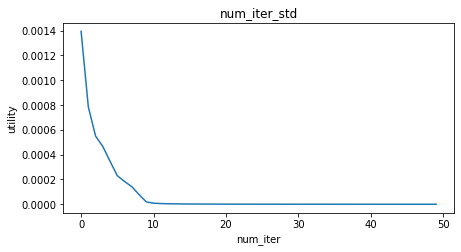

In [10]:
# 计算最大迭代次数
ps=Portfolio_Selection(data.values,s=1,period=2,money=2000,random_state=7)
res=ps.cal_best_iter()

plt.figure(figsize=(7,3.5))
plt.title('num_iter_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
plt.figure(1)
plt.plot(res[0])
plt.savefig('figure/num_iter_mean.png',dpi=600)

plt.figure(figsize=(7,3.5))
plt.title('num_iter_std')
plt.ylabel('utility')
plt.xlabel('num_iter')
plt.figure(2)
plt.plot(res[1])
plt.savefig('figure/num_iter_std.png',dpi=600)

###### 候选解个数

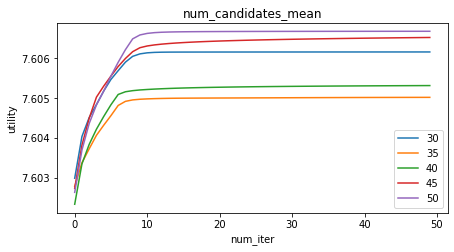

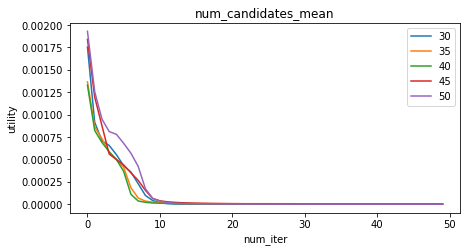

In [11]:
# 计算最优候选解个数
ps=Portfolio_Selection(data.values,s=1,period=2,money=2000,random_state=7)
candidates_list=[30,35,40,45,50]
res=ps.cal_best_candidates(candidates_list)

plt.figure(figsize=(7,3.5))
plt.title('num_candidates_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in range(len(candidates_list)):
    plt.plot(res[0][i])
plt.legend(candidates_list)
plt.savefig('figure/num_candidates_mean.png',dpi=600)

plt.figure(figsize=(7,3.5))
plt.title('num_candidates_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in range(len(candidates_list)):
    plt.plot(res[1][i])
plt.legend(candidates_list)
plt.savefig('figure/num_candidates_std.png',dpi=600)

##### 单期遗传算法

In [12]:
ps=Portfolio_Selection(data.values,s=1,period=2,money=2000,random_state=0)
ps.fit()
ps.get_sharpe()

0.0983946620871584

##### 多期遗传算法

In [13]:
ps=Portfolio_Selection(data.values,s=5,period=2,money=2000,random_state=1)
ps.fit()
ps.get_sharpe()

0.10013806100149374

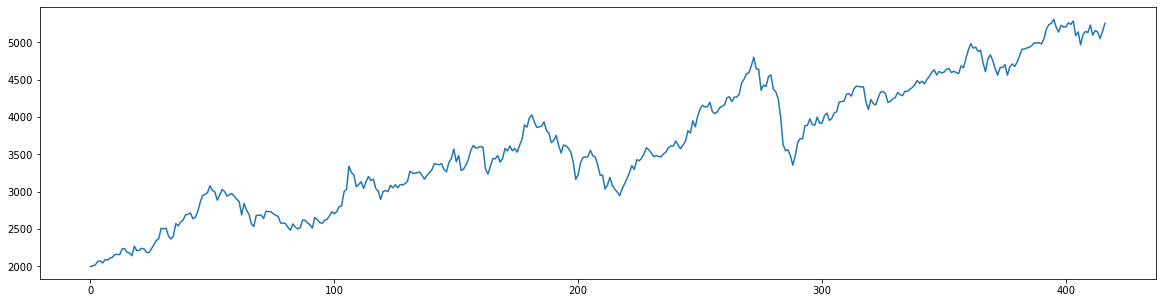

In [14]:
# 净值图
plt.figure(figsize=(20,5))
plt.plot(ps.moneys)

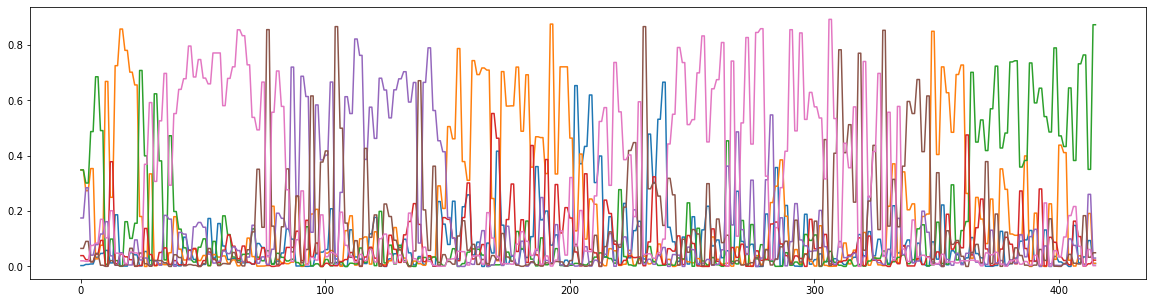

In [15]:
# 持仓图
weights_series=list(np.array(ps.get_weights()).transpose(1,0))
plt.figure(figsize=(20,5))
for i in range(7):
    plt.plot(weights_series[i])

In [5]:
np.std(np.array(ps.get_weights()),axis=0)

array([0.11821128, 0.23445872, 0.20966079, 0.09595218, 0.20093523,
       0.19235918, 0.28265103])

##### 数据描述性统计

In [46]:
data.corr()

,多伦多综指,德国DAX,日经225,纽约证交所综指,恒生指数,马来西亚综指,韩国综指
多伦多综指,1.000000,0.558640,0.448492,0.780797,0.552383,0.447102,0.358269
德国DAX,0.558640,1.000000,0.481790,0.646862,0.488810,0.368594,0.331242
日经225,0.448492,0.481790,1.000000,0.511340,0.365781,0.275627,0.436340
纽约证交所综指,0.780797,0.646862,0.511340,1.000000,0.540758,0.439734,0.369851
恒生指数,0.552383,0.488810,0.365781,0.540758,1.000000,0.527645,0.357462
马来西亚综指,0.447102,0.368594,0.275627,0.439734,0.527645,1.000000,0.297929
韩国综指,0.358269,0.331242,0.436340,0.369851,0.357462,0.297929,1.000000


In [47]:
data.describe()

,多伦多综指,德国DAX,日经225,纽约证交所综指,恒生指数,马来西亚综指,韩国综指
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,0.001935,0.002970,0.001137,0.002724,0.003122,0.001753,0.002755
std,0.019020,0.025449,0.024616,0.018476,0.034499,0.030636,0.031647
min,-0.111424,-0.127390,-0.118199,-0.107249,-0.252583,-0.186300,-0.138151
25%,-0.006815,-0.009876,-0.011084,-0.007400,-0.013081,-0.011377,-0.013682
50%,0.003522,0.005052,0.003177,0.004489,0.005079,0.002758,0.001008
75%,0.013733,0.018049,0.017093,0.014038,0.021988,0.015538,0.018461
max,0.057917,0.084139,0.079409,0.051731,0.114881,0.127865,0.172686
